In [1]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def En(j, n, m, folder='', k = 0):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + k
    return Energy



In [3]:
def En1(j, n, m, folder=''):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
        j = j + 1
    return Energy

In [4]:
enn = En1(1, 1, 61, 'ED-PP/')
enn1 = En1(0, 2, 61, 'ED-PP/')

In [5]:
#E(N, 0) : (2, 0), (3, 0), ... (118, 0)

#E(N+1, 1) : (3, 1), (4, 1), ... (119, 1)

#E(N-1, 1) : (1, 1), (3, 1), ... (117, 1)

en0 = En(0, 1, 119)
en1 = En(1, 1, 120)


In [6]:
h = []
mu = []
for x in range(1, 118):
    h.append((en1[x - 1] - en0[x]) / -2)
    mu.append((en1[x + 1] - en0[x]) / 2)

h1 = []
mu1 = []
for x in range(0, 59):
    h1.append((enn1[x] - enn[x]) / 2)
    mu1.append((enn[x + 1] - enn[x]) / 2)

print(len(h1))

59


In [7]:
e10 = en0[0]
e11 = en1[0]

h2 = np.arange(h[0], 2.7, 0.1)
def mu2(h):
    return - h + e10

h3 = np.arange(5.3, 9, 0.2)
def mu3(h):
    return -h - e10

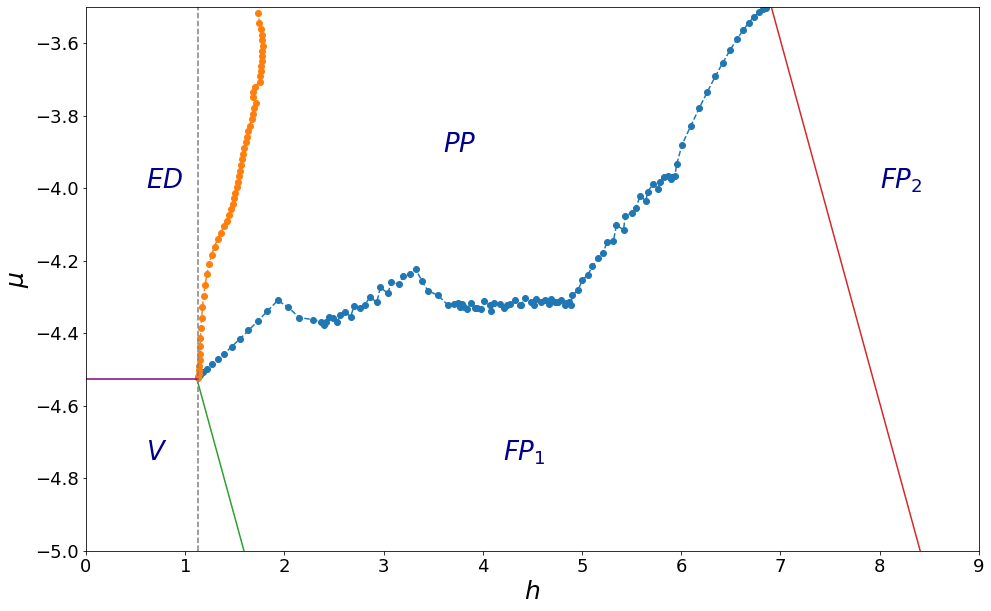

In [8]:
plt.figure(figsize=(16, 10))
xscale = 9

plt.plot(h, mu, 'o--')
plt.plot(h1, mu1, 'o--')
plt.axhline(y=(e11/2), color='purple', xmax=(h[0]/xscale))
plt.plot(h2, mu2(h2), '-')
plt.plot(h3, mu3(h3), '-')
plt.axvline(x=h[0],linestyle='--', color='grey')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(0.6, -4.0, '$ED$', fontsize=26, color='darkblue')
plt.text(0.6, -4.75, '$V$', fontsize=26, color='darkblue')
plt.text(3.6, -3.9, '$PP$', fontsize=26, color='darkblue')
plt.text(4.2, -4.75, '$FP_1$', fontsize=26, color='darkblue')
plt.text(8, -4, '$FP_2$', fontsize=26, color='darkblue')

plt.xlabel('$h$', size=25)
plt.ylabel('$\mu$', size=25)
plt.axis([0, xscale, -5, -3.5])
plt.savefig('w=3')

In [10]:
def trunc_error(j, n, m, folder=''):
    te = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        te.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][1]['MEAN']))
        j = j + 1
    return te

def maxstates(j, n, m, folder=''):
    ms = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        ms.append(int(data_dict['SIMULATION']['PARAMETERS']['PARAMETER'][1]['#text']))
        j = j + 1
    return ms

def sweeps(j, n, m, folder=''):
    s = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/t-1/" + folder
    for i in range(n, m):
        file_name = str(i) +'-'+ str(j) + ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        s.append(int(data_dict['SIMULATION']['PARAMETERS']['PARAMETER'][10]['#text']))
        j = j + 1
    return s

In [11]:
te1 = trunc_error(1, 1, 60, "ED-PP/")
ms = maxstates(1, 1, 60, "ED-PP/")
s = sweeps(1, 1, 60, "ED-PP/")

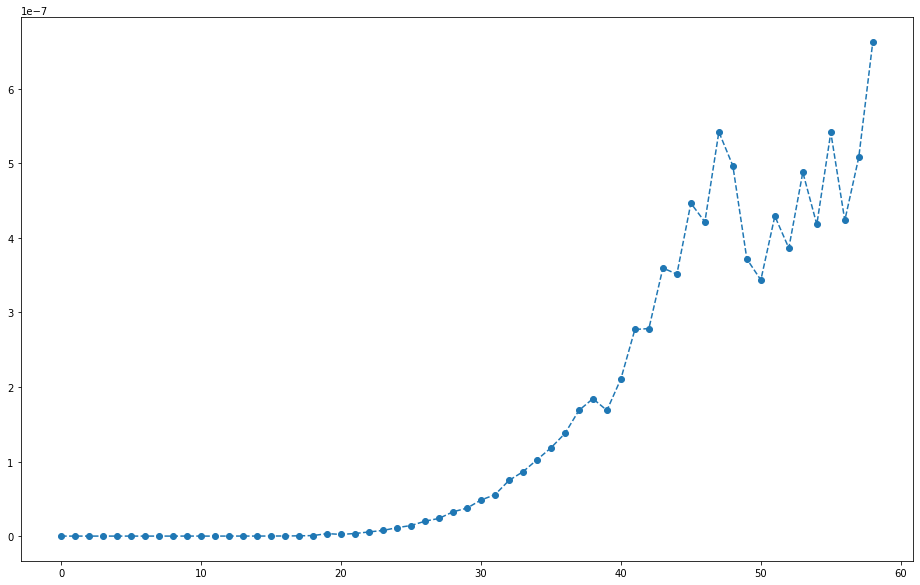

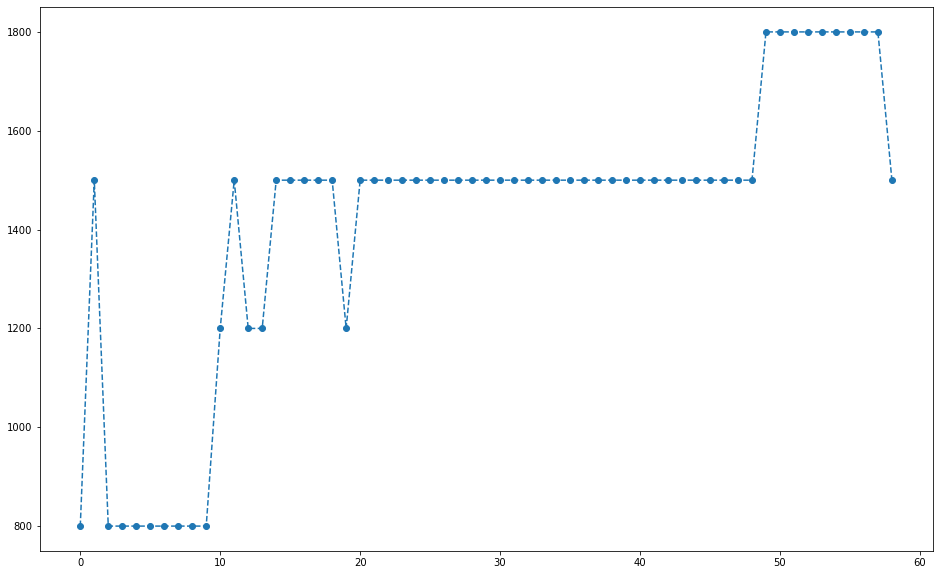

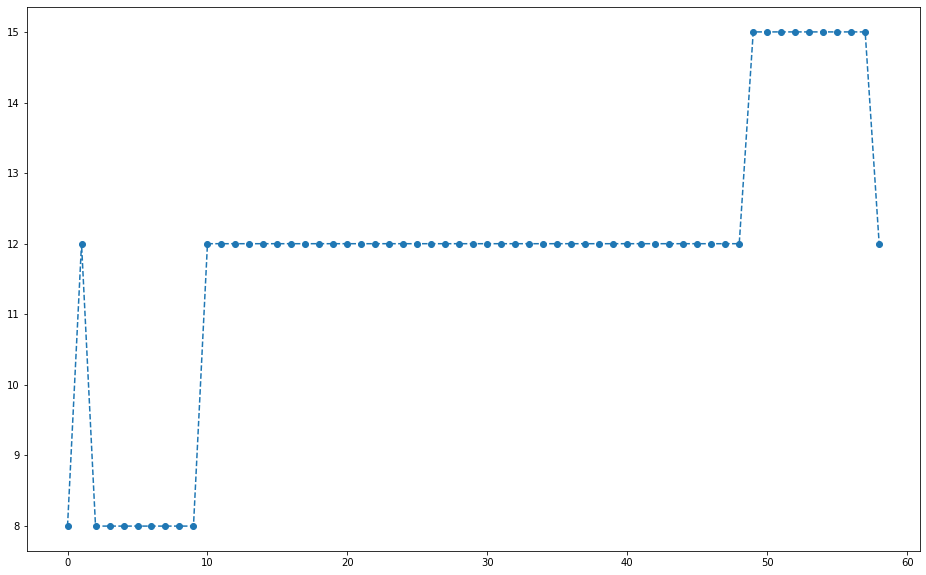

In [12]:
plt.figure(figsize=(16, 10))
plt.plot(te1, 'o--')
plt.show()
plt.figure(figsize=(16, 10))
plt.plot(ms, 'o--')
plt.show()
plt.figure(figsize=(16, 10))
plt.plot(s, 'o--')
plt.show()

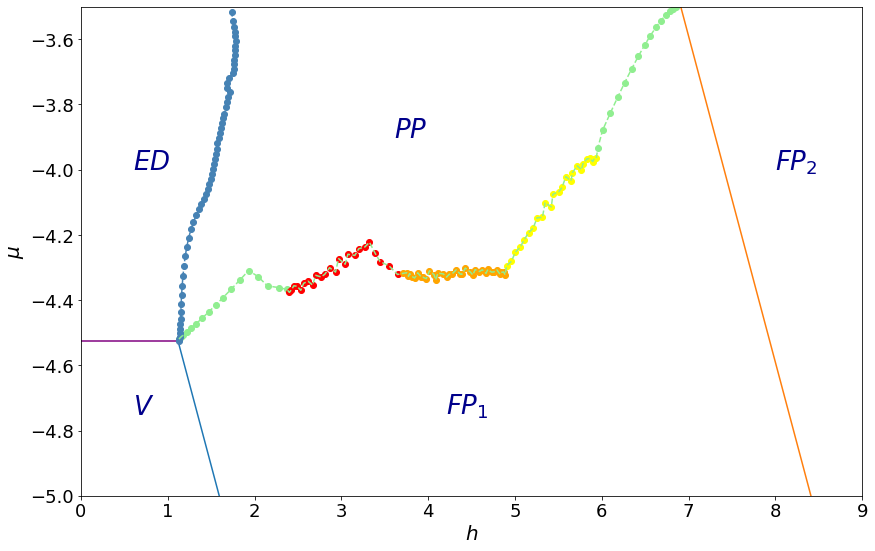

In [13]:
plt.figure(figsize=(14, 9))
xscale = 9
plt.axhline(y=(e11/2), color='purple', xmax=(h[0]/xscale))
plt.plot(h2, mu2(h2), '-')
plt.plot(h1, mu1, 'o--', color='steelblue')
plt.plot(h3, mu3(h3), '-')
plt.plot(h, mu, '--', color='lightgreen')
for i in range(0, len(mu)):
    if 17 <= i < 41:
        plt.scatter(h[i], mu[i], marker='o', color='red')
    elif 41 <= i < 77:
        plt.scatter(h[i], mu[i], marker='o', color='orange')
    elif 77 <= i < 102:
        plt.scatter(h[i], mu[i], marker='o', color='yellow')
    else:
        plt.scatter(h[i], mu[i], marker='o', color='lightgreen')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.text(0.6, -4.0, '$ED$', fontsize=26, color='darkblue')
plt.text(0.6, -4.75, '$V$', fontsize=26, color='darkblue')
plt.text(3.6, -3.9, '$PP$', fontsize=26, color='darkblue')
plt.text(4.2, -4.75, '$FP_1$', fontsize=26, color='darkblue')
plt.text(8, -4, '$FP_2$', fontsize=26, color='darkblue')
plt.axis([0, xscale, -5, -3.5])
plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.savefig('w=3_2')